# Problem definition
Dataset description:
The dataset contains CpG methylation values per CpG and per individual as a table
(“MethylDataWithDbgapId.txt”). Each column is an individual and each row is a CpG, values
in the table are methylation values.
“subjects.txt” has the information on the individuals. Most important attribute here is the age.
The ids (db gap ids) in this table should match the columns on the first table. There are other
attributes such as sex and Race, they can also be important.
Problem:
Main question is what is the relationship between age and methylation?
0) Which strategies/methods can be used to test these ideas on this data set ?
[list some methods and how they can be used to text this. Give software package names
that can be used for the strategies you mention]
1) Is methylation predictive of age (previous research indicates so)?
[pick one strategy from 0 and implement it to answer the question above
2) Are all CpGs associated with age? If not, which CpGs are more important for age
prediction?
You can use any resource that you want, prepare a small report answering the questions
above. You can of course use any resources to get ideas. There are many different avenues
to tackle this problem. The report should include text, code and figures.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# we can survey from two different ways:
1. first, we consider 5 age groups which consist of (infants, children, teenagers, adults, and over adults) and determine the activity of methylation sites(which methylation value is high) in these age ranges

2. secondly, we can determine the correlation between each of the different sites with age 
3. For the prediction there are several models to investigate:
    1. Classification: classify methylation values based on the age group using KNN algorithms to see based on the array of the site values whih age category the person is in. The point is that based on the high number of the sites we need dimension reduction like PCA too. We can also remove the sites which have least correlation with the age and then use the classification algorithms.  
    2. Predict each site activation based on the age, sex, etc using Regression (Leanear/Nonlinear)

P.S: using correlation methods like spearman and person just is our first step but if I wanna tell some eagle view I'll try more ML methods for classifications like boosters and RF even DT for prediction of Age_category based on methylation and vice versa ( test to predict methylation based on age_cats).
through the Lens of a biologist when we predict a GCps before methylation gonna helps to diagnose it before it happened, so I'm keen on predicting methylation with age sex, and race,...


In [13]:
subjects = pd.read_csv("/home/ghazl/Documents/practic/subjects.txt",  delimiter = "\t", index_col=0)

In [14]:
subjects

,dbGaP ID,Age,sex,Race
ID,,,,
1,34,63.000000,M,CAUC
2,35,26.531506,F,CAUC
3,37,51.479452,F,AA
4,39,75.572602,F,CAUC
5,40,0.482191,F,AA
...,...,...,...,...
104,25,53.956164,M,AA
105,26,45.939726,M,AA
106,27,0.408219,M,AA


In [15]:
subjects.columns = ["dbGaPID", "age", "sex", "race"]

In [16]:
subjects = subjects.set_index("dbGaPID")

In [17]:
metIds =  pd.read_csv("/home/ghazl/Documents/practic/metRmOlWithDbgapId.txt",  delimiter = "\t", index_col=0)

In [18]:
metIds

,34,35,37,39,40,41,44,46,52,53,...,14,18,19,269,24,25,26,27,28,31
dbGapSubjctId,,,,,,,,,,,,,,,,,,,,,
cg26211698,0.018852,0.023741,0.023376,0.037224,0.018712,0.025110,0.015484,0.021162,0.020475,0.026372,...,0.022684,0.021980,0.022296,0.025086,0.018492,0.019187,0.025315,0.023315,0.019223,0.018230
cg03790787,0.068036,0.081941,0.103914,0.051119,0.104110,0.088810,0.081404,0.076911,0.062057,0.081126,...,0.057089,0.081262,0.118663,0.082806,0.086863,0.078102,0.090376,0.104590,0.079274,0.083737
cg04672450,0.009639,0.013243,0.010931,0.022289,0.012151,0.013536,0.016800,0.013280,0.013590,0.007595,...,0.009227,0.011758,0.009513,0.009652,0.009818,0.009355,0.008954,0.013901,0.007831,0.015042
cg14324200,0.204592,0.064252,0.133139,0.059606,0.092799,0.113580,0.094694,0.166240,0.158260,0.175960,...,0.108734,0.121616,0.181430,0.104992,0.156035,0.196719,0.112995,0.112599,0.147677,0.157535
cg04485075,0.010062,0.015012,0.012881,0.047412,0.017496,0.022166,0.014335,0.011306,0.011356,0.013433,...,0.013298,0.015789,0.012658,0.019463,0.016777,0.013480,0.011508,0.014426,0.014793,0.013828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg22415432,0.036936,0.039335,0.038415,0.011352,0.038588,0.035204,0.059946,0.032939,0.038712,0.035260,...,0.027126,0.038100,0.026386,0.036874,0.036575,0.038281,0.033395,0.039843,0.029094,0.045354
cg20401549,0.041803,0.296774,0.312115,0.300000,0.300000,0.278788,0.314861,0.252232,0.049029,0.047651,...,0.047299,0.332500,0.313625,0.046247,0.055431,0.049517,0.035901,0.062483,0.049167,0.280543
cg15812957,0.977235,0.397238,0.964026,0.392934,0.435589,0.939434,0.564567,0.574039,0.975047,0.973772,...,0.976497,0.461237,0.500961,0.963892,0.977533,0.974378,0.979597,0.961994,0.971672,0.619577


In [19]:
transposeMetIds = metIds.transpose()

In [20]:
transposeMetIds

dbGapSubjctId,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,cg02397514,cg08122545,cg20022511,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
34,0.018852,0.068036,0.009639,0.204592,0.010062,0.800023,0.462352,0.010359,0.014241,0.024511,...,0.858198,0.037048,0.050371,0.839864,0.057449,0.036936,0.041803,0.977235,0.982263,0.228583
35,0.023741,0.081941,0.013243,0.064252,0.015012,0.757389,0.124470,0.009590,0.010681,0.023458,...,0.784234,0.370115,0.178465,0.746734,0.070442,0.039335,0.296774,0.397238,0.962622,0.005128
37,0.023376,0.103914,0.010931,0.133139,0.012881,0.739141,0.379570,0.010761,0.011507,0.019871,...,0.730472,0.361771,0.244913,0.752119,0.067030,0.038415,0.312115,0.964026,0.983653,0.005530
39,0.037224,0.051119,0.022289,0.059606,0.047412,0.689842,0.157468,0.011589,0.021806,0.018534,...,0.689165,0.238311,0.241135,0.616743,0.091766,0.011352,0.300000,0.392934,0.974200,0.005386
40,0.018712,0.104110,0.012151,0.092799,0.017496,0.712690,0.129949,0.016549,0.021869,0.035068,...,0.772377,0.285998,0.183953,0.728753,0.047729,0.038588,0.300000,0.435589,0.954342,0.008301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.019187,0.078102,0.009355,0.196719,0.013480,0.711165,0.383898,0.010203,0.017723,0.029475,...,0.896250,0.027941,0.040804,0.782765,0.057599,0.038281,0.049517,0.974378,0.986495,0.215775
26,0.025315,0.090376,0.008954,0.112995,0.011508,0.817218,0.257395,0.012598,0.012199,0.032489,...,0.892621,0.024781,0.062670,0.745807,0.053408,0.033395,0.035901,0.979597,0.985662,0.136854
27,0.023315,0.104590,0.013901,0.112599,0.014426,0.732689,0.171057,0.015935,0.017750,0.059183,...,0.866342,0.043881,0.048908,0.771985,0.056404,0.039843,0.062483,0.961994,0.968560,0.176094
28,0.019223,0.079274,0.007831,0.147677,0.014793,0.793576,0.326627,0.010020,0.012206,0.027346,...,0.879875,0.033118,0.047257,0.774735,0.057035,0.029094,0.049167,0.971672,0.986326,0.202141


In [21]:
transposeMetIds = transposeMetIds.astype(float)
transposeMetIds.dtypes

dbGapSubjctId
cg26211698    float64
cg03790787    float64
cg04672450    float64
cg14324200    float64
cg04485075    float64
               ...   
cg22415432    float64
cg20401549    float64
cg15812957    float64
cg21825364    float64
cg23654549    float64
Length: 27578, dtype: object

In [22]:
transposeMetIds.index = transposeMetIds.index.astype('int64')

In [23]:
mergedData = subjects.join(transposeMetIds)

In [24]:
mergedData

,age,sex,race,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
dbGaPID,,,,,,,,,,,,,,,,,,,,,
34,63.000000,M,CAUC,0.018852,0.068036,0.009639,0.204592,0.010062,0.800023,0.462352,...,0.858198,0.037048,0.050371,0.839864,0.057449,0.036936,0.041803,0.977235,0.982263,0.228583
35,26.531506,F,CAUC,0.023741,0.081941,0.013243,0.064252,0.015012,0.757389,0.124470,...,0.784234,0.370115,0.178465,0.746734,0.070442,0.039335,0.296774,0.397238,0.962622,0.005128
37,51.479452,F,AA,0.023376,0.103914,0.010931,0.133139,0.012881,0.739141,0.379570,...,0.730472,0.361771,0.244913,0.752119,0.067030,0.038415,0.312115,0.964026,0.983653,0.005530
39,75.572602,F,CAUC,0.037224,0.051119,0.022289,0.059606,0.047412,0.689842,0.157468,...,0.689165,0.238311,0.241135,0.616743,0.091766,0.011352,0.300000,0.392934,0.974200,0.005386
40,0.482191,F,AA,0.018712,0.104110,0.012151,0.092799,0.017496,0.712690,0.129949,...,0.772377,0.285998,0.183953,0.728753,0.047729,0.038588,0.300000,0.435589,0.954342,0.008301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,53.956164,M,AA,0.019187,0.078102,0.009355,0.196719,0.013480,0.711165,0.383898,...,0.896250,0.027941,0.040804,0.782765,0.057599,0.038281,0.049517,0.974378,0.986495,0.215775
26,45.939726,M,AA,0.025315,0.090376,0.008954,0.112995,0.011508,0.817218,0.257395,...,0.892621,0.024781,0.062670,0.745807,0.053408,0.033395,0.035901,0.979597,0.985662,0.136854
27,0.408219,M,AA,0.023315,0.104590,0.013901,0.112599,0.014426,0.732689,0.171057,...,0.866342,0.043881,0.048908,0.771985,0.056404,0.039843,0.062483,0.961994,0.968560,0.176094


## Age distribution

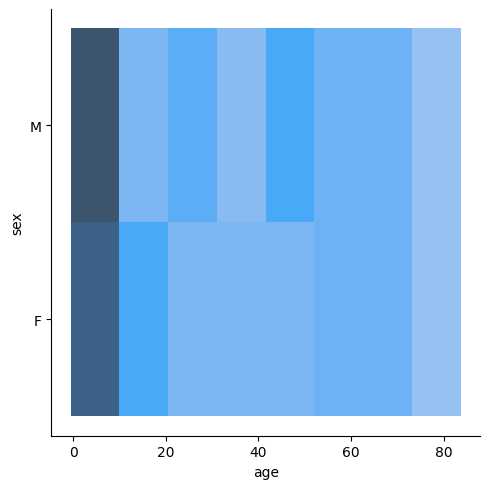

In [27]:
sns.displot(data=mergedData, x = 'age', y= "sex" ,stat='probability')

In [33]:
mergedData[["age"]].describe()

,age
count,108.000000
mean,25.908346
std,26.279307
min,-0.498630
25%,-0.402739
50%,18.846575
75%,49.610958
max,83.641095


In [34]:
cleanData = mergedData.loc[mergedData["age"] > 0]

In [35]:
cleanData

,age,sex,race,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
dbGaPID,,,,,,,,,,,,,,,,,,,,,
34,63.000000,M,CAUC,0.018852,0.068036,0.009639,0.204592,0.010062,0.800023,0.462352,...,0.858198,0.037048,0.050371,0.839864,0.057449,0.036936,0.041803,0.977235,0.982263,0.228583
35,26.531506,F,CAUC,0.023741,0.081941,0.013243,0.064252,0.015012,0.757389,0.124470,...,0.784234,0.370115,0.178465,0.746734,0.070442,0.039335,0.296774,0.397238,0.962622,0.005128
37,51.479452,F,AA,0.023376,0.103914,0.010931,0.133139,0.012881,0.739141,0.379570,...,0.730472,0.361771,0.244913,0.752119,0.067030,0.038415,0.312115,0.964026,0.983653,0.005530
39,75.572602,F,CAUC,0.037224,0.051119,0.022289,0.059606,0.047412,0.689842,0.157468,...,0.689165,0.238311,0.241135,0.616743,0.091766,0.011352,0.300000,0.392934,0.974200,0.005386
40,0.482191,F,AA,0.018712,0.104110,0.012151,0.092799,0.017496,0.712690,0.129949,...,0.772377,0.285998,0.183953,0.728753,0.047729,0.038588,0.300000,0.435589,0.954342,0.008301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,53.956164,M,AA,0.019187,0.078102,0.009355,0.196719,0.013480,0.711165,0.383898,...,0.896250,0.027941,0.040804,0.782765,0.057599,0.038281,0.049517,0.974378,0.986495,0.215775
26,45.939726,M,AA,0.025315,0.090376,0.008954,0.112995,0.011508,0.817218,0.257395,...,0.892621,0.024781,0.062670,0.745807,0.053408,0.033395,0.035901,0.979597,0.985662,0.136854
27,0.408219,M,AA,0.023315,0.104590,0.013901,0.112599,0.014426,0.732689,0.171057,...,0.866342,0.043881,0.048908,0.771985,0.056404,0.039843,0.062483,0.961994,0.968560,0.176094


## Removing the records which subject has negative value for the age

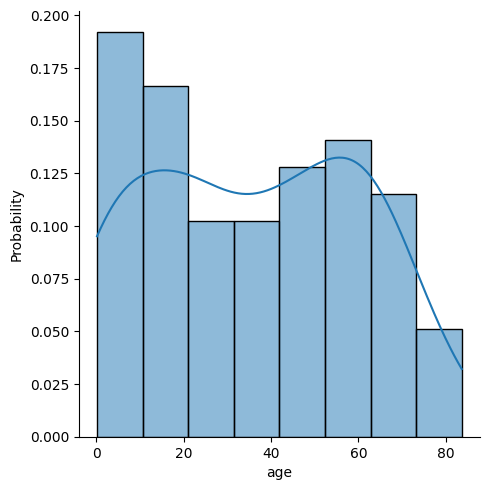

In [36]:
sns.displot(data=cleanData, x = 'age', stat='probability', kde=True)

# Now we can see the methylation in different age groups

# based on https://www.nih.gov/nih-style-guide/age
Infants (1 month to 1 year)
Children (1 year through 12 years)
Teenager (13 years through 17 years)
adult(18 +)
Older adults (65 and older)

In [37]:
# define the age ranges and categories
age_ranges = [0, 1, 12, 18, 65, float('inf')]
age_categories = ['Infants', 'Children', 'Teenager','Adult', 'Older adults']
cleanData['Age_Category'] = pd.cut(cleanData['age'], bins=age_ranges, labels=age_categories)

/tmp/ipykernel_13100/3364458706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['Age_Category'] = pd.cut(cleanData['age'], bins=age_ranges, labels=age_categories)


In [38]:
cleanData.sex.value_counts()

M    42
F    36
Name: sex, dtype: int64

In [39]:
cleanData.Age_Category.value_counts()

Adult           48
Children         9
Older adults     8
Infants          7
Teenager         6
Name: Age_Category, dtype: int64

In [41]:
cleanData

,age,sex,race,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,...,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549,Age_Category
dbGaPID,,,,,,,,,,,,,,,,,,,,,
34,63.000000,M,CAUC,0.018852,0.068036,0.009639,0.204592,0.010062,0.800023,0.462352,...,0.037048,0.050371,0.839864,0.057449,0.036936,0.041803,0.977235,0.982263,0.228583,Adult
35,26.531506,F,CAUC,0.023741,0.081941,0.013243,0.064252,0.015012,0.757389,0.124470,...,0.370115,0.178465,0.746734,0.070442,0.039335,0.296774,0.397238,0.962622,0.005128,Adult
37,51.479452,F,AA,0.023376,0.103914,0.010931,0.133139,0.012881,0.739141,0.379570,...,0.361771,0.244913,0.752119,0.067030,0.038415,0.312115,0.964026,0.983653,0.005530,Adult
39,75.572602,F,CAUC,0.037224,0.051119,0.022289,0.059606,0.047412,0.689842,0.157468,...,0.238311,0.241135,0.616743,0.091766,0.011352,0.300000,0.392934,0.974200,0.005386,Older adults
40,0.482191,F,AA,0.018712,0.104110,0.012151,0.092799,0.017496,0.712690,0.129949,...,0.285998,0.183953,0.728753,0.047729,0.038588,0.300000,0.435589,0.954342,0.008301,Infants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,53.956164,M,AA,0.019187,0.078102,0.009355,0.196719,0.013480,0.711165,0.383898,...,0.027941,0.040804,0.782765,0.057599,0.038281,0.049517,0.974378,0.986495,0.215775,Adult
26,45.939726,M,AA,0.025315,0.090376,0.008954,0.112995,0.011508,0.817218,0.257395,...,0.024781,0.062670,0.745807,0.053408,0.033395,0.035901,0.979597,0.985662,0.136854,Adult
27,0.408219,M,AA,0.023315,0.104590,0.013901,0.112599,0.014426,0.732689,0.171057,...,0.043881,0.048908,0.771985,0.056404,0.039843,0.062483,0.961994,0.968560,0.176094,Infants


In [42]:
age_grouped_df = cleanData.groupby(['Age_Category']).mean()


In [17]:
age_grouped_df

,age,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,cg02397514,cg08122545,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
Age_Category,,,,,,,,,,,,,,,,,,,,,
Infants,0.467319,0.023482,0.102116,0.013757,0.101733,0.021662,0.721633,0.133955,0.015162,0.023312,...,0.834320,0.100186,0.097058,0.776774,0.057110,0.038054,0.128649,0.826057,0.965562,0.072010
Children,5.092846,0.028459,0.093702,0.012295,0.111736,0.025522,0.719629,0.228804,0.015533,0.023526,...,0.799097,0.133480,0.130264,0.704180,0.061757,0.035004,0.164731,0.829238,0.975425,0.116481
Teenager,15.238812,0.024849,0.087162,0.012856,0.137034,0.017484,0.764131,0.290808,0.014148,0.018894,...,0.806186,0.209573,0.169270,0.773811,0.058956,0.032904,0.204581,0.763002,0.972714,0.062693
Adult,43.403538,0.025156,0.090499,0.013605,0.143516,0.020627,0.768807,0.336641,0.014276,0.020489,...,0.818715,0.156198,0.130361,0.775086,0.062373,0.037006,0.163756,0.831643,0.974462,0.108845
Older adults,73.380137,0.030804,0.090864,0.019023,0.132142,0.026535,0.774719,0.291383,0.015552,0.025297,...,0.786398,0.183378,0.172322,0.769090,0.067988,0.033759,0.219150,0.832421,0.972147,0.081383


In [43]:
cats_index = [0, 1, 2, 3, 4]
cats_label = ['Infants', 'Children', 'Teenager', 'Adult', 'Older Adults']
def plotDistForAgeCats(data):
    i = 0
    for c in cats_label:
        temp=age_grouped_df.iloc[i,3:]
        top_cg=temp.sort_values(ascending=False)
        sns.displot(data=top_cg).set(title=f'Most value of CGs in {c} Category')
        i=i+1 

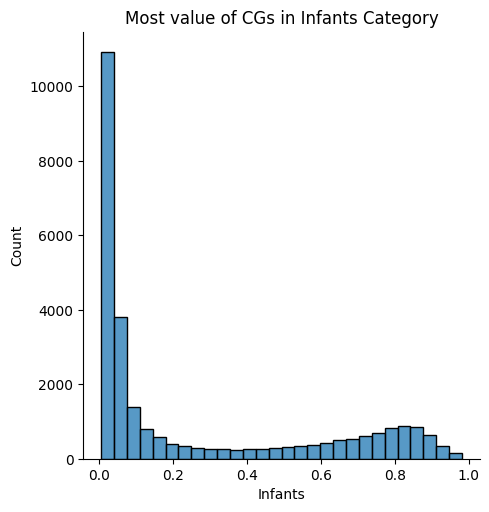

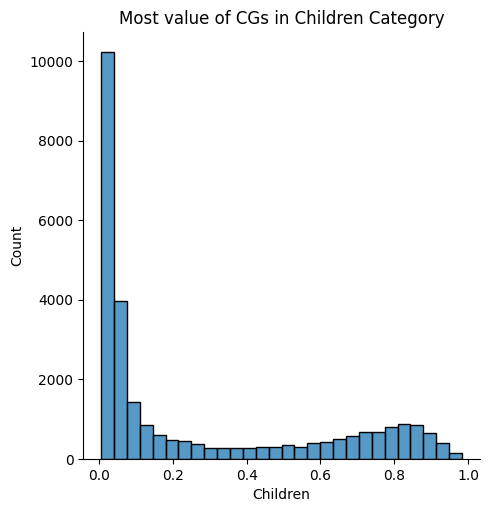

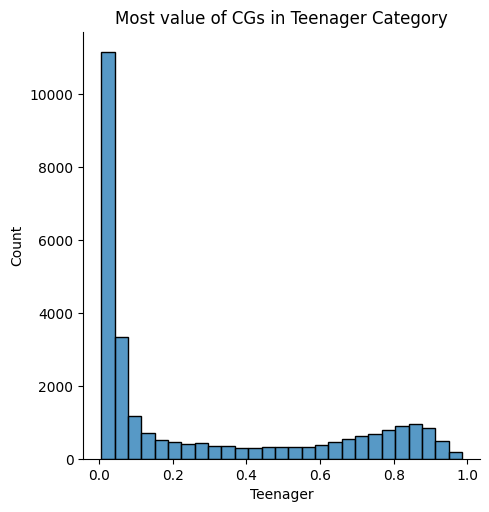

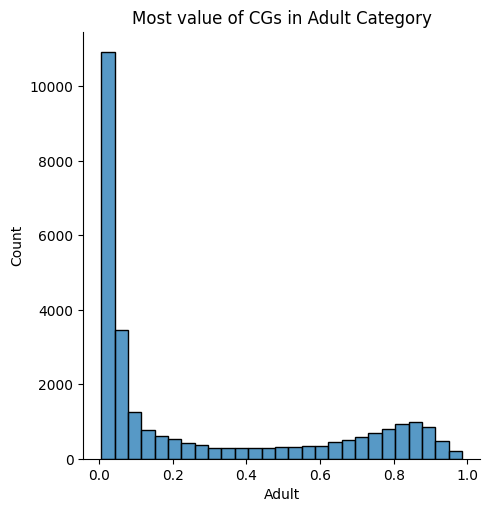

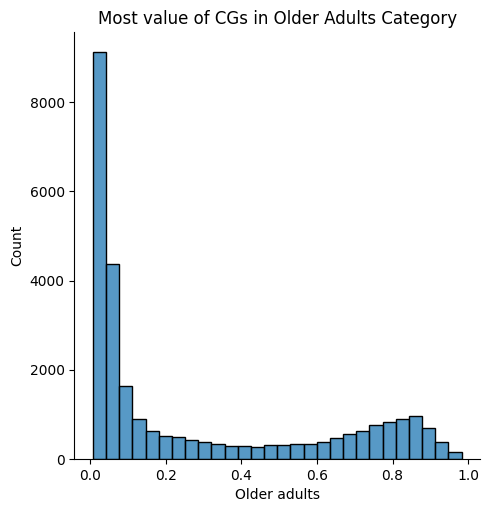

In [44]:
plotDistForAgeCats(age_grouped_df)

## Now we can see age related methylation in different sites

In [45]:
methCols = cleanData.columns[cleanData.columns.str.startswith("cg")].values

In [46]:
methCols

array(['cg26211698', 'cg03790787', 'cg04672450', ..., 'cg15812957',
       'cg21825364', 'cg23654549'], dtype=object)

In [48]:
def reportCorrelations(data):
    correlations = np.array([data["age"].corr(data[col]) for col in methCols])
    sns.displot(correlations, stat='probability', bins=10, kde=True)
    morethan7 = (correlations > 0.8).sum()
    lessthanm7 = (correlations < -0.8).sum()

    print(f"More than {(morethan7)/len(correlations)} of the sites are highly correleted")
    print(f"More than {(lessthanm7)/len(correlations)} of the sites are highly anticorrelated")


### Correlation report between age and the methylation on each site

#### Report for all the subjecs despite the sex

More than 0.0017042570164623975 of the sites are highly correleted
More than 3.6260787584306334e-05 of the sites are highly anticorrelated


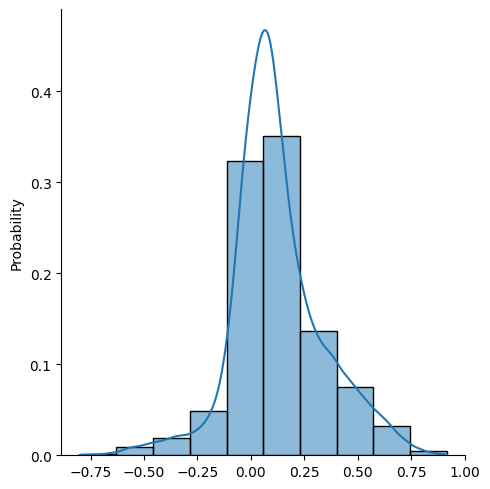

In [49]:
reportCorrelations(cleanData)

#### Report for all the female subjects

More than 0.0011603452026978027 of the sites are highly correleted
More than 3.6260787584306334e-05 of the sites are highly anticorrelated


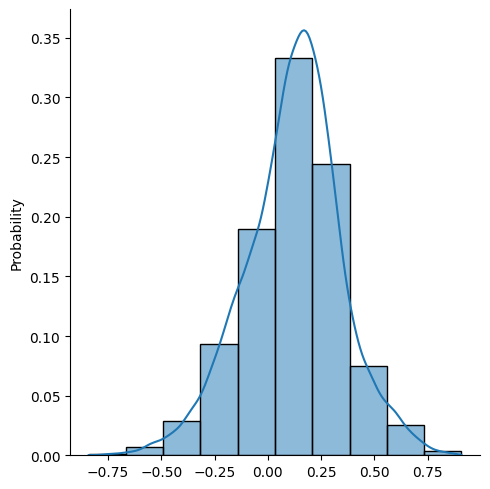

In [52]:
femaleData = cleanData[cleanData["sex"] == "F"]
reportCorrelations(femaleData)

#### Report for all the male subjects

More than 0.006780767278265284 of the sites are highly correleted
More than 0.00014504315033722533 of the sites are highly anticorrelated


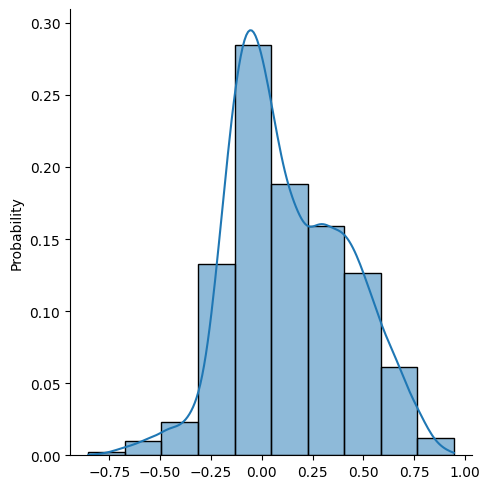

In [53]:
maleData = cleanData[cleanData["sex"] == "M"]
reportCorrelations(maleData)

#### As it can be shown for the male subjects the age-correlated methylation is higher (~2% vs ~0.6% )

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression 

In [66]:
y=cleanData[['age']].values.ravel()
x=cleanData[methCols].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [69]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [73]:
y_pred = regr.predict(x_test)

In [76]:
import matplotlib.pyplot as plt

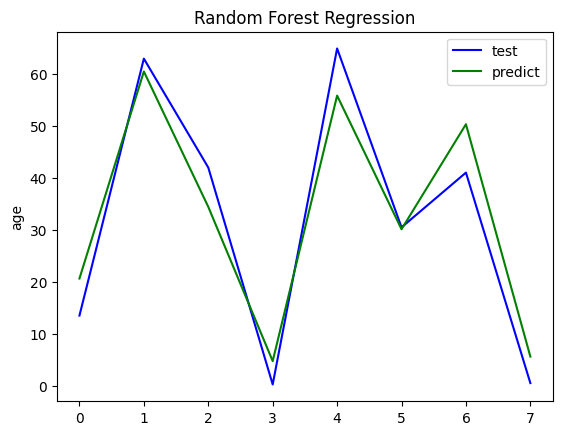

In [81]:
plt.plot(y_test, color = 'blue')

plt.plot(y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('')
plt.ylabel('age')
plt.legend(["test",'predict'])
plt.show()


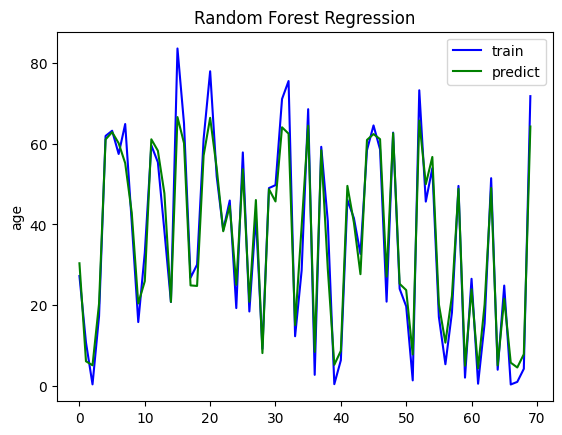

In [83]:
plt.plot(y_train, color = 'blue')
plt.plot(regr.predict(x_train), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('')
plt.ylabel('age')
plt.legend(["train",'predict'])
plt.show()

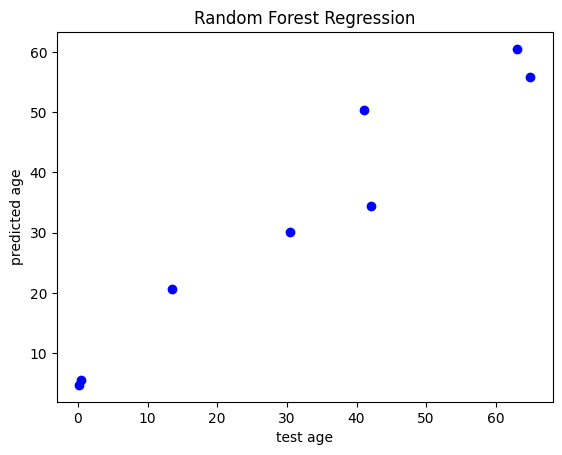

In [86]:
plt.scatter(y_test,y_pred , color = 'blue')

plt.title('Random Forest Regression')
plt.xlabel('test age')
plt.ylabel('predicted age')
plt.show()

ValueError: x and y must be the same size

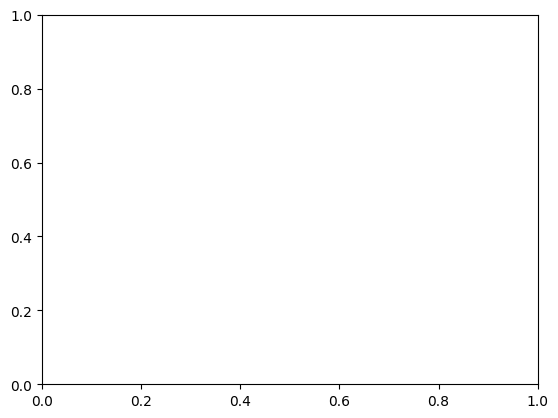

In [87]:
plt.scatter(y_train,y_pred , color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('test age')
plt.ylabel('predicted age')
plt.show()